## Synthetic Particle Trajectory Velocimetry
- uses the MATLAB toolbox [PIVLab](https://www.mathworks.com/matlabcentral/fileexchange/27659-pivlab-particle-image-velocimetry-piv-tool-with-gui)
- use the displacements generated using Particle Image Velocimetry (PIV) to displace artificially seeded particles
- view the resulting trajectories

# Module imports
- need to install pims

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pims

# Load images and Particle Image Velocimetry data
- examine displacement in sand
- plot first and last frame
- note the different zones of displacement

In [2]:
images = pims.ImageSequence('../data/*.jpg')
pfiles = glob.glob('../data/github_test_*.txt')
pfiles.sort()

In [3]:
images

<Frames>
Source: D:\Dropbox\morphagenetests\sptv_code\data\*.jpg
Length: 20 frames
Frame Shape: (150, 250, 3)
Pixel Datatype: uint8

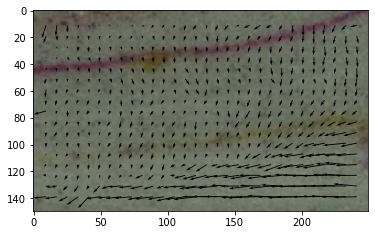

In [4]:
data = pd.read_csv(pfiles[0], skiprows=3, usecols=[0, 1, 2, 3],
                   names=['x', 'y', 'u', 'v'])
plt.imshow(images[0])
plt.quiver(data.x,data.y,data.u,data.v)

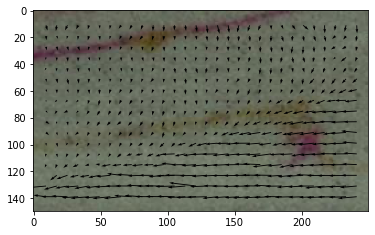

In [5]:
data = pd.read_csv(pfiles[-1], skiprows=3, usecols=[0, 1, 2, 3],
                   names=['x', 'y', 'u', 'v'])
plt.imshow(images[-1])
plt.quiver(data.x,data.y,data.u,data.v)

# Run main.py to generate particle trajectories
- Uses the function particle_displacer to move seeded particles with displacement field for multiple images (here 20 images)
- Read results in and plot

In [6]:
run ../src/main.py

TypeError: particle_displacer() got multiple values for argument 'radius'

In [7]:
pts = pd.read_csv('../data/pjt_highfric_15deg_glass1cm_071619_crop_artificial_pts_temp.csv')

In [8]:
pts.head()

,frame,particle,x,y
0,501.0,0.0,-1.678560,0.168361
1,501.0,1.0,0.753549,4.346883
2,501.0,2.0,0.753549,8.475915
3,501.0,3.0,-0.500503,12.327540
4,501.0,4.0,-0.500503,16.456572


# Plot trajectories
- plot selected particles for ease of viewing

In [9]:
 def tp_plot_traj(trajs,sample_int=1,particle_int=1,scaled=False,save=False,
                 cmap=plt.cm.jet):
    '''
    Convenience function to plot all trajs in a given dataframe
        with scaled axes.
    Optional settings for plotting every [sample_int] particle location and/or
        every [particle_int] particle, useful for extremely large datasets.
    '''
    f, ax = plt.subplots(figsize=(15,15))
    particles = np.sort(trajs['particle'].unique()[::particle_int])
    trajs = trajs[trajs.particle.isin(particles)]
    # initialize plot 
    #   place ticks outside of plot to avoid covering image
    #   remove right and upper axes to simplify plot
    #   only plot ticks on the left and bottom of plot
    ax.tick_params(axis='y', direction='out')
    ax.tick_params(axis='x', direction='out')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    # plot particle trajs leading up to current fram
    if scaled:
        x = trajs['x']/scale
        y = trajs['y']/scale
    else:
        x = trajs['x']
        y = trajs['y']
    ax.scatter(x[::sample_int],y[::sample_int],
               c=trajs['frame'][::sample_int],marker='o',
               s=2, cmap=cmap,lw=0,
               vmin=trajs.frame.min(),vmax=trajs.frame.max())
    plt.axis('scaled')
    if scaled:
        ax.set_xlim([0,im_w/scale])
        ax.set_ylim([0,im_h/scale])
        ax.set_xlabel('Width [cm]')
        ax.set_ylabel('Height [cm]')
    else:
        ax.set_xlim([0,im_w])
        ax.set_ylim([0,im_h])     
        ax.set_xlabel('Width [px]')
        ax.set_ylabel('Height [px]')
    if save:
        plt.savefig('%s_f%05ito%05i.png'%(prefix,trajs.frame.min(),
                                          trajs.frame.max()),dpi=200,
                                          bbox_inches='tight')
        plt.close('all')

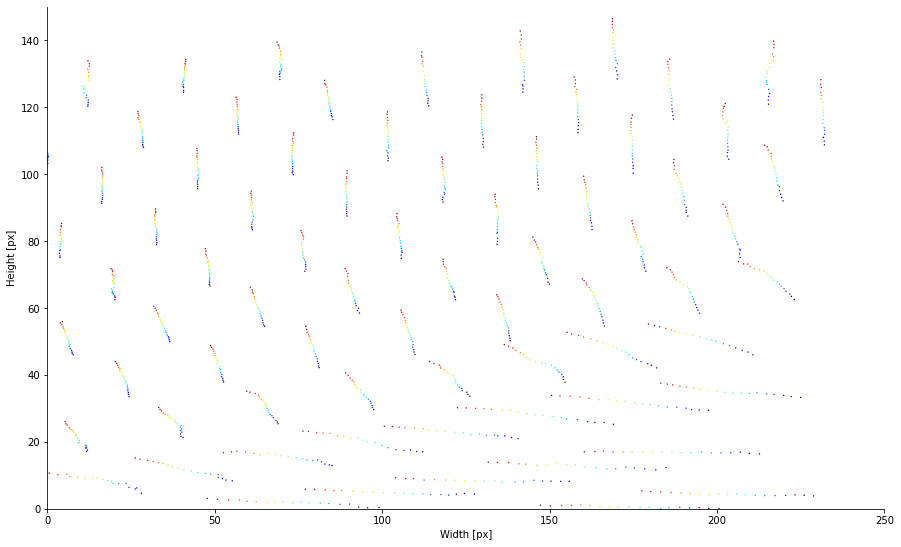

In [10]:
tp_plot_traj(pts,particle_int=25)

In [11]:
pts_sel = pts[pts.particle.isin(pts.particle.unique()[::25])]

In [12]:
for i,f in enumerate(pts_sel.frame.unique()):
    plt.figure()
    plt.imshow(np.flipud(images[i]))
    plt.plot(pts_sel[pts_sel.frame == f].x,
             pts_sel[pts_sel.frame == f].y,'k+')
    plt.gca().invert_yaxis()
    plt.xlim(0,250)
    plt.ylim(0,150)
    #plt.savefig(f'frame_{int(f)}.png') # uncomment to save initially
    plt.close('all') #supress output

# Video
- create video of particle positions and play

<video controls src="./sptv_ex.mp4">animation</video>